In [36]:
# for QR codes use inline
%matplotlib inline
qr_setting = 'url'
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# The Matrix of a Linear Transformation

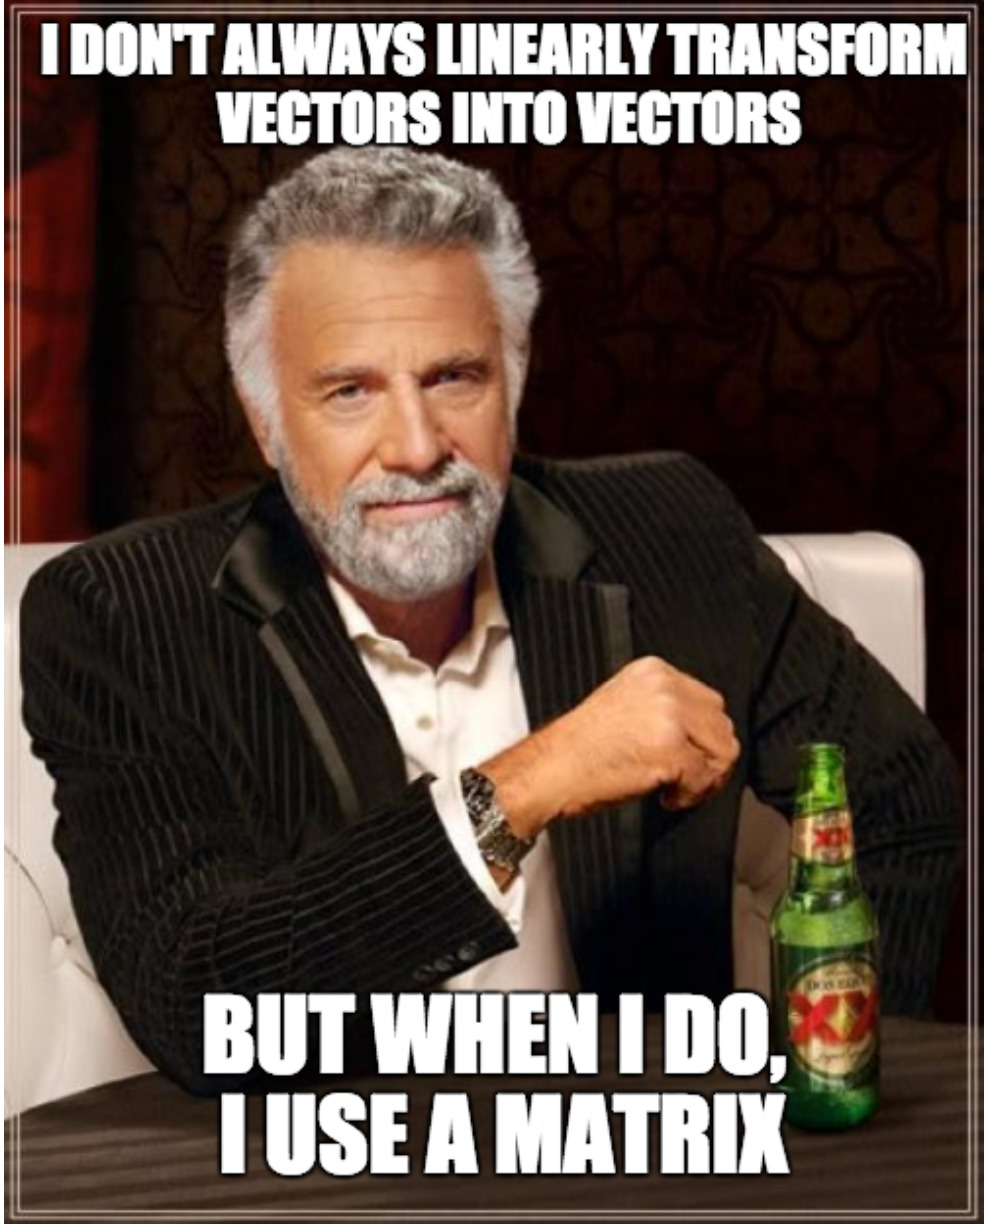

In [37]:
# image credit: https://imgflip.com/memetemplate/The-Most-Interesting-Man-In-The-World
display(Image("images/Dos-Equis-Linear-Transform.jpg", width=350))

In the last lecture we introduced the idea of a __linear transformation__:

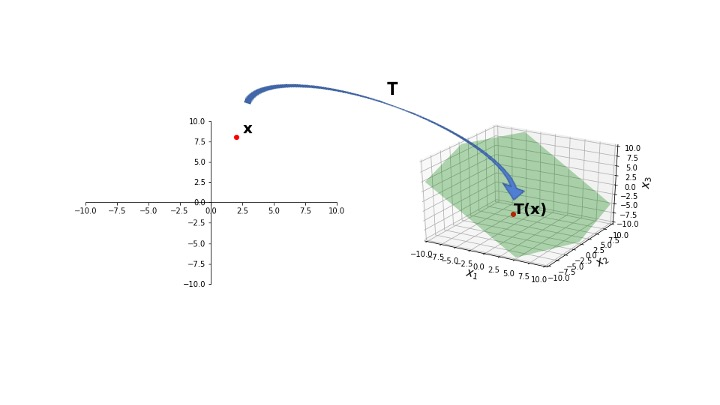

In [38]:
# image credit: Lay, 4th edition
display(Image("images/L7 F4.jpg", width=650))

We have seen that every matrix multiplication is a linear transformation from vectors to vectors.

But, are there any other possible linear transformations from vectors to vectors?

No. 

In other words, the reverse statement is also true:  

__every linear transformation from vectors to vectors is a matrix multiplication.__

We'll now prove this fact.   We'll do it __constructively__, meaning we'll actually show how to find the matrix corresponding to any given linear transformation $T$.

__Theorem.__  Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ be a linear transformation.   There there is a unique matrix $A$ such that:

$$ T({\bf x}) = A{\bf x} \;\;\; \mbox{for all}\; {\bf x} \in \mathbb{R}^n.$$

In fact, $A$ is the $m \times n$ matrix whose $j$th column is the vector $T({\bf e_j})$, where ${\bf e_j}$ is the $j$the column of the identity matrix in $\mathbb{R}^n$:

$$A = \left[T({\bf e_1}) \dots T({\bf e_n})\right].$$

$A$ is called the _standard matrix_ of $T$.

__Proof.__  Write 

$${\bf x} = I{\bf x} = \left[{\bf e_1} \dots {\bf e_n}\right]\bf x$$

$$ = x_1{\bf e_1} + \dots + x_n{\bf e_n}.$$

Because $T$ is linear, we have:

$$ T({\bf x}) = T(x_1{\bf e_1} + \dots + x_n{\bf e_n})$$

$$ = x_1T({\bf e_1}) + \dots + x_nT({\bf e_n})$$

$$ = \left[T({\bf e_1}) \dots T({\bf e_n})\right] \, \left[\begin{array}{r}x_1\\\vdots\\x_n\end{array}\right] = A{\bf x}.$$


The term _linear transformation_ focuses on a __property__ of the mapping, while the term _matrix multiplication_ focuses on how such a mapping is __implemented.__

For example, we find the standard matrix of a linear tranformation of $\mathbb{R}^2 \rightarrow \mathbb{R}^2$ by asking what the transformation does to the columns of $I$.

Now, in $\mathbb{R}^2$, $I = \left[\begin{array}{cc}1&0\\0&1\end{array}\right]$.   So:

$$ \mathbf{e_1} = \left[\begin{array}{c}1\\0\end{array}\right]\;\;\mbox{and}\;\;\mathbf{e_2} = \left[\begin{array}{c}0\\1\end{array}\right]$$.

So to find the matrix of any given linear transformation, we only have to know what that transformation does to these two points:

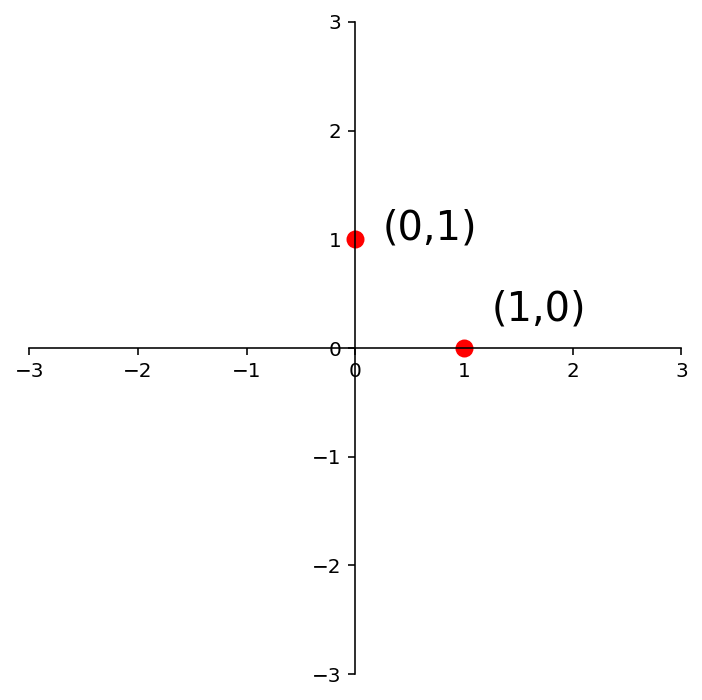

In [39]:
ax = dm.plotSetup(-3,3,-3,3,size=(6,6))
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20);

This is a __hugely__ powerful tool.  

Let's say we start from some given linear transformation; we can use this idea to find the matrix that implements that linear transformation.  

For example, let's consider rotation about the origin as a kind of transformation.

Is it a __linear__ transformation?

Recall that a for a transformation to be linear, it must be true that $T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v}).$

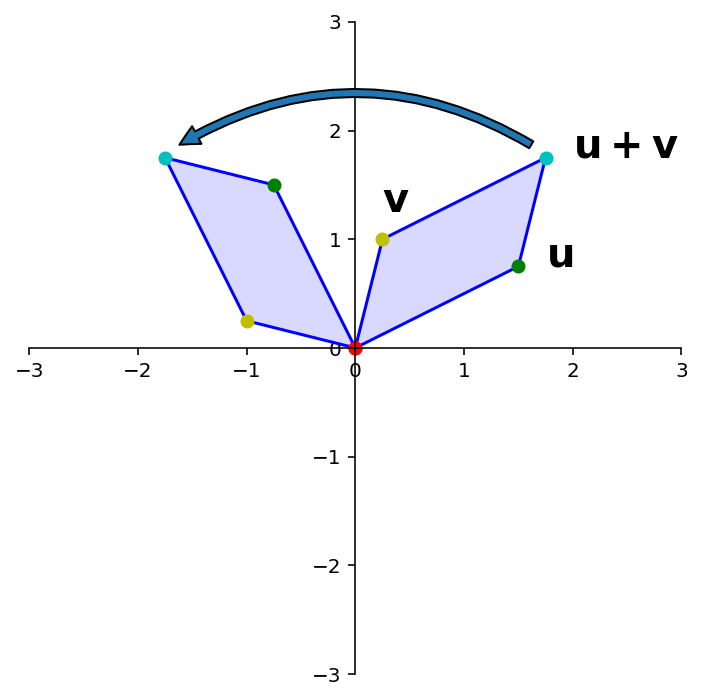

In [40]:
u = np.array([1.5, 0.75])
v = np.array([0.25, 1])
diamond = np.array([[0,0], u,  u+v, v]).T
ax = dm.plotSetup()
dm.plotSquare(diamond)
ax.text(u[0]+.25,u[1],r'$\bf{u}$',size=20)
ax.text(v[0],v[1]+.25,r'$\bf{v}$',size=20)
ax.text(u[0]+v[0]+.25,u[1]+v[1],r'$\bf{u + v}$',size=20)
rotation = np.array([[0, -1],[1, 0]])
up = rotation @ u
vp = rotation @ v
diamond = np.array([[0,0], up,  up+vp, vp]).T
dm.plotSquare(diamond)
ax.annotate("",
            xy=((up+vp)[0]+.1, (up+vp)[1]+.1), xycoords='data',
            xytext=((u+v)[0]-.1, (u+v)[1]+.1), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"),
            );

OK, so it is linear.  let's see how to compute the linear transformation that is a rotation.

__Example.__  Let $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ be the transformation that rotates each point in $\mathbb{R}^2$ about the origin through an angle $\varphi$, with counterclockwise rotation for a positive angle.  Find the standard matrix $A$ of this transformation.

__Solution.__  The columns of $I$ are ${\bf e_1} = \left[\begin{array}{r}1\\0\end{array}\right]$ and ${\bf e_2} = \left[\begin{array}{r}0\\1\end{array}\right].$

Referring to the diagram below, we can see that $\left[\begin{array}{r}1\\0\end{array}\right]$ rotates into $\left[\begin{array}{r}\cos\varphi\\\sin\varphi\end{array}\right],$ and $\left[\begin{array}{r}0\\1\end{array}\right]$ rotates into $\left[\begin{array}{r}-\sin\varphi\\\cos\varphi\end{array}\right].$

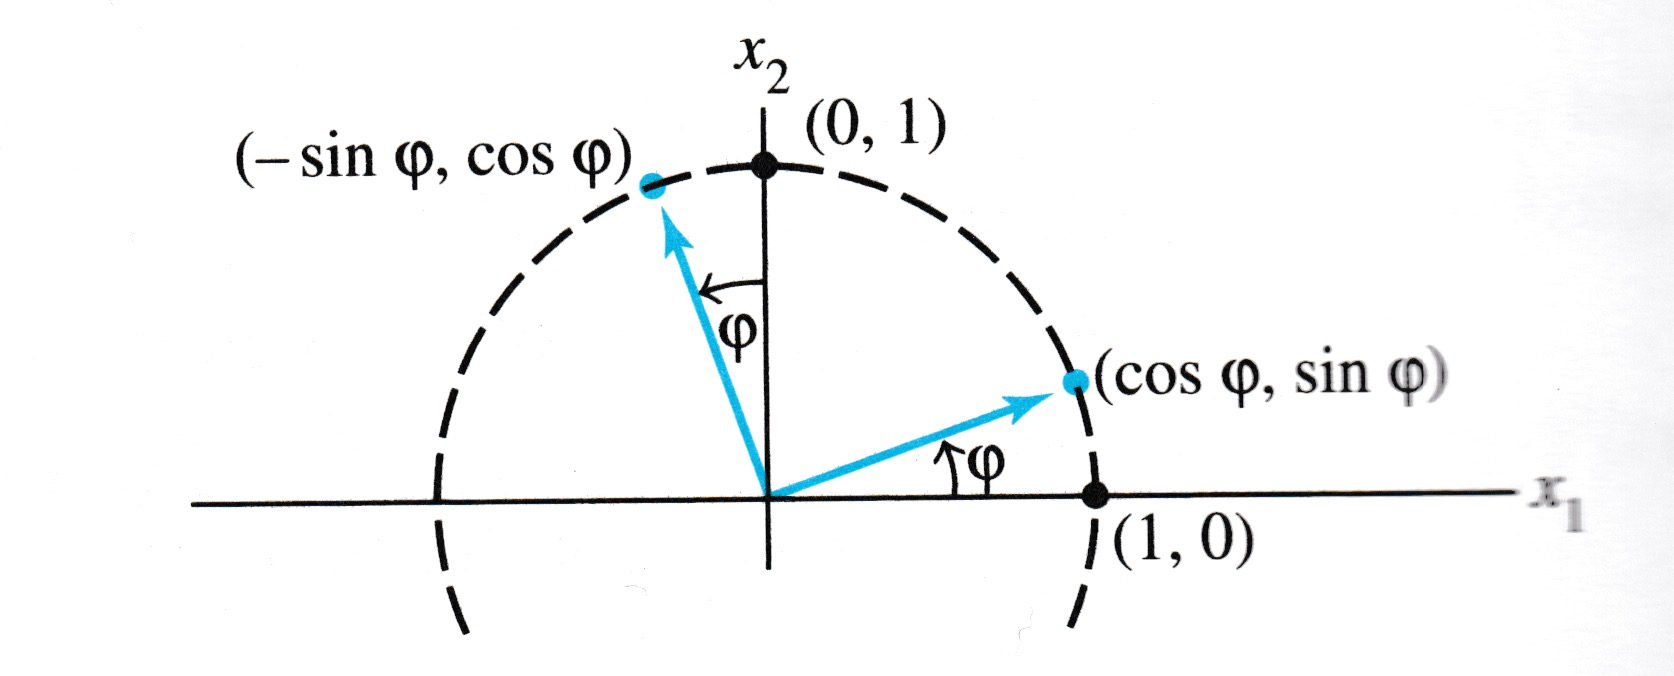

In [41]:
# image credit: Lay, 4th edition
display(Image("images/rotate-example.jpeg", width=550))

So by the Theorem above, 

$$ A = \left[\begin{array}{rr}\cos\varphi&-\sin\varphi\\\sin\varphi&\cos\varphi\end{array}\right].$$

To demonstrate the use of a rotation matrix, let's rotate the following shape:

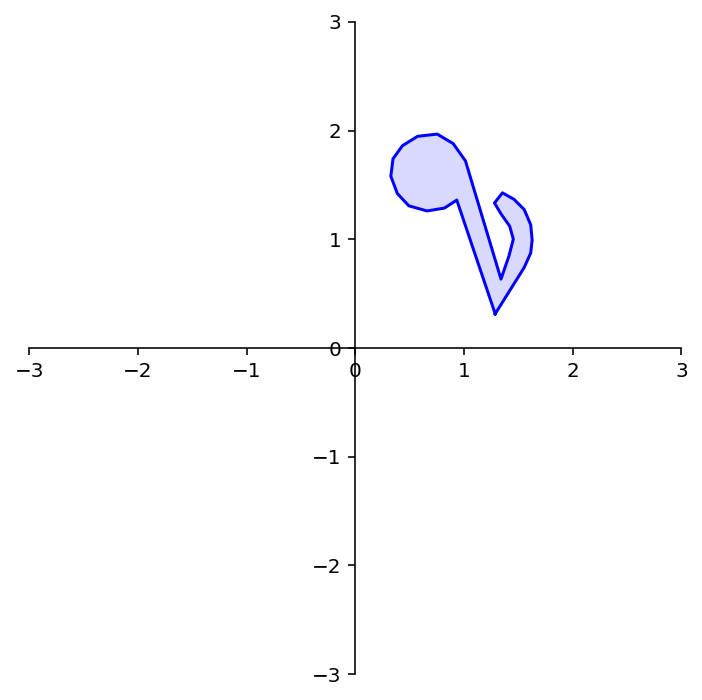

In [42]:
dm.plotSetup()
note = dm.mnote()
dm.plotShape(note)

The variable `note` is a array of 26 vectors in $\mathbb{R}^2$ that define its shape.   

In other words, it is a 2 $\times$ 26 matrix.

To rotate `note` we need to multiply each column of `note` by the rotation matrix $A$.

In Python matrix multiplication is performed using the `@` operator.  

That is, if `A` and `B` are matrices,

`A @ B`

will multiply `A` by every column of `B,` and the resulting vectors will be formed
into a matrix.

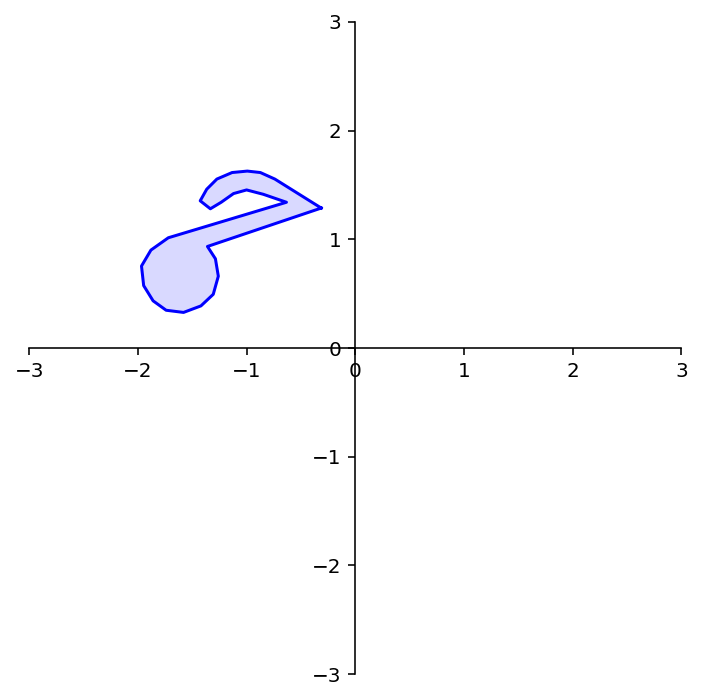

In [43]:
dm.plotSetup()
angle = 90
phi = (angle/180) * np.pi
A = np.array(
    [[np.cos(phi), -np.sin(phi)],
     [np.sin(phi), np.cos(phi)]])
rnote = A @ note
dm.plotShape(rnote)

## Geometric Linear Transformations of $\mathbb{R}^2$

Let's use our understanding of how to constuct linear transformations to look at some specific linear transformations of $\mathbb{R}^2$ to $\mathbb{R}^2$.

First, let's recall the linear transformation 

$$T(\mathbf{x}) = r\mathbf{x}.$$

With $r > 1$, this is a dilation.  It moves every vector further from the origin.  

Let's say the dilation is by a factor of 2.5.

To construct the matrix $A$ that implements this transformation, we ask: where do ${\bf e_1}$ and ${\bf e_2}$ go?

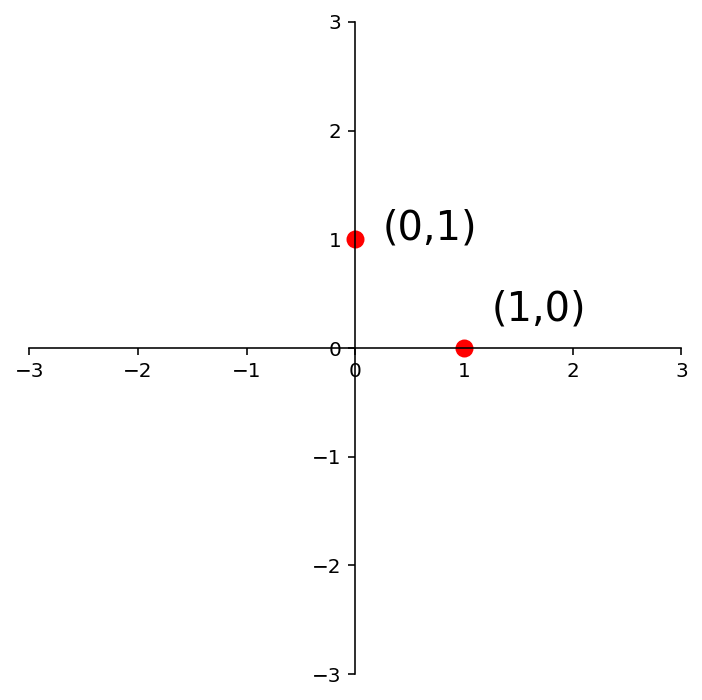

In [44]:
ax = dm.plotSetup()
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20);

Under the action of $A$, $\mathbf{e_1}$ goes to $\left[\begin{array}{c}2.5\\0\end{array}\right]$ and $\mathbf{e_2}$ goes to $\left[\begin{array}{c}0\\2.5\end{array}\right]$.

So the matrix $A$ must be $\left[\begin{array}{cc}2.5&0\\0&2.5\end{array}\right]$.

Let's test this out:

A = 
 [[2.5 0. ]
 [0.  2.5]]


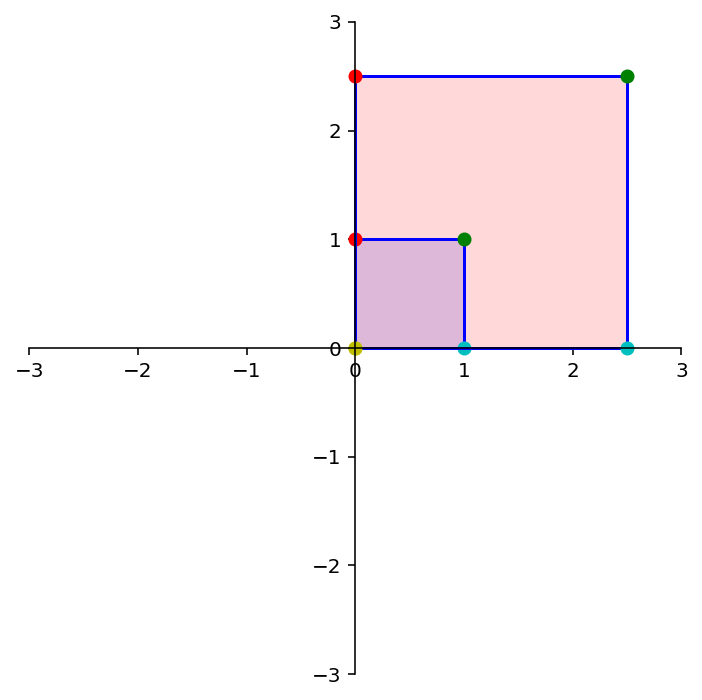

In [45]:
square = np.array(
    [[0,1,1,0],
     [1,1,0,0]])
A = np.array(
    [[2.5, 0],
     [0, 2.5]])
print('A = \n',A)
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')

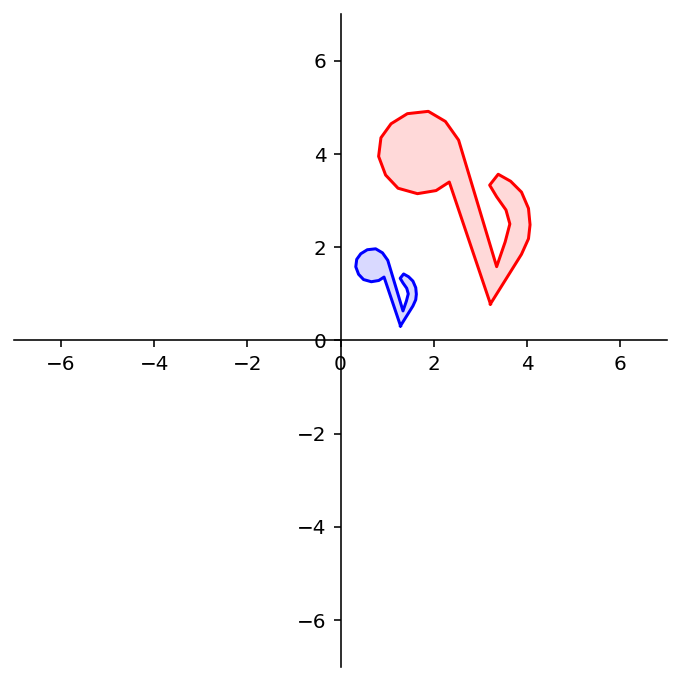

In [46]:
dm.plotSetup(-7,7,-7, 7)
dm.plotShape(note)
dm.plotShape(A @ note,'r')

``` {toggle}
Question Time! Q8.1
```

OK, now let's reflect through the $x_1$ axis.   Where do ${\bf e_1}$ and ${\bf e_2}$ go?

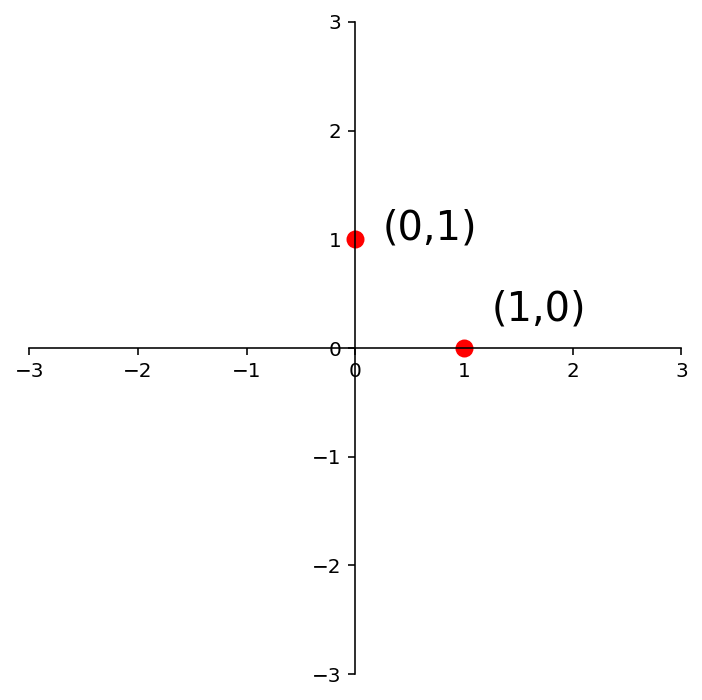

In [47]:
ax = dm.plotSetup()
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20);

<IPython.core.display.Latex object>

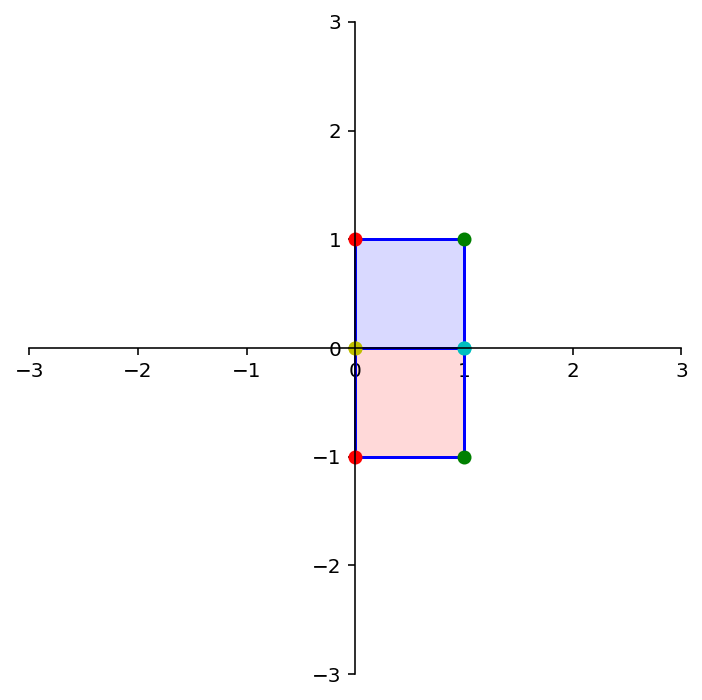

In [48]:
A = np.array(
    [[1, 0],
     [0,-1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
Latex(r'Reflection through the $x_1$ axis')

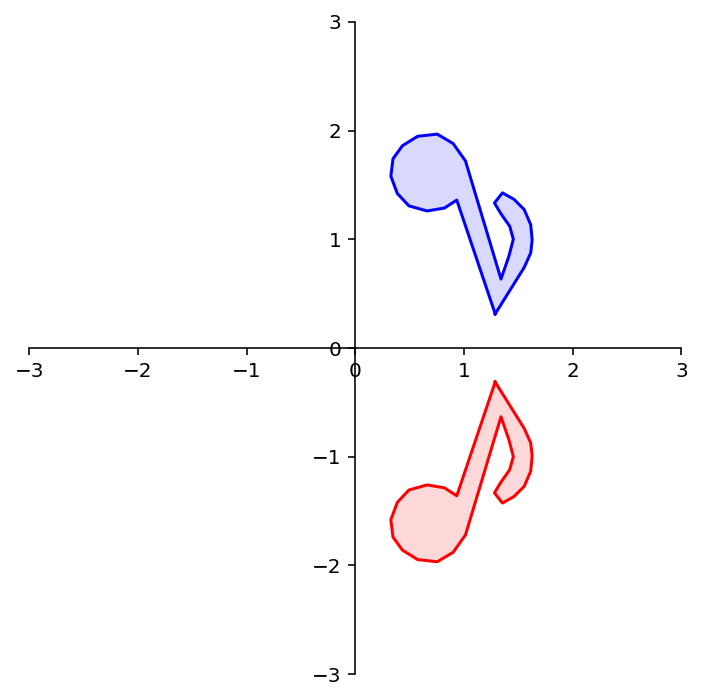

In [49]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the $x_2$ axis?

<IPython.core.display.Latex object>

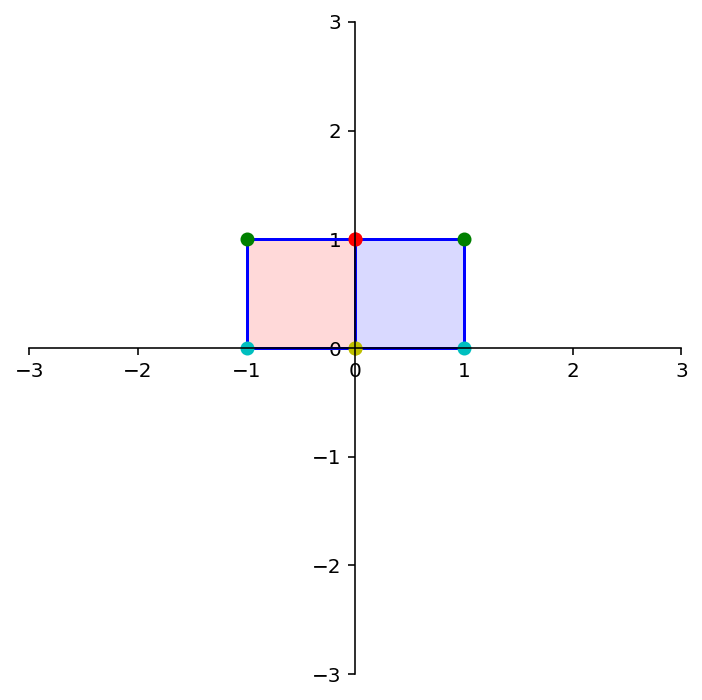

In [50]:
A = np.array(
    [[-1,0],
     [0, 1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
Latex(r'Reflection through the $x_2$ axis')

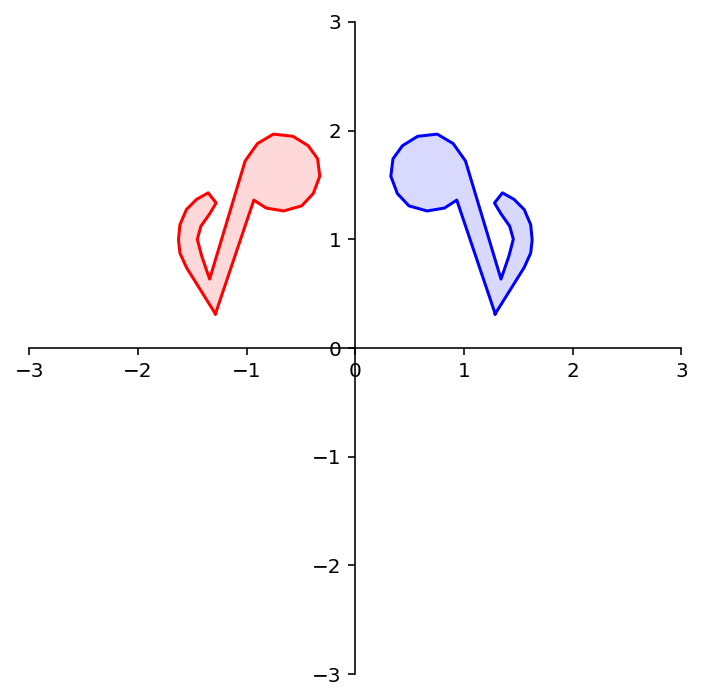

In [51]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the line $x_1 = x_2$?

<IPython.core.display.Latex object>

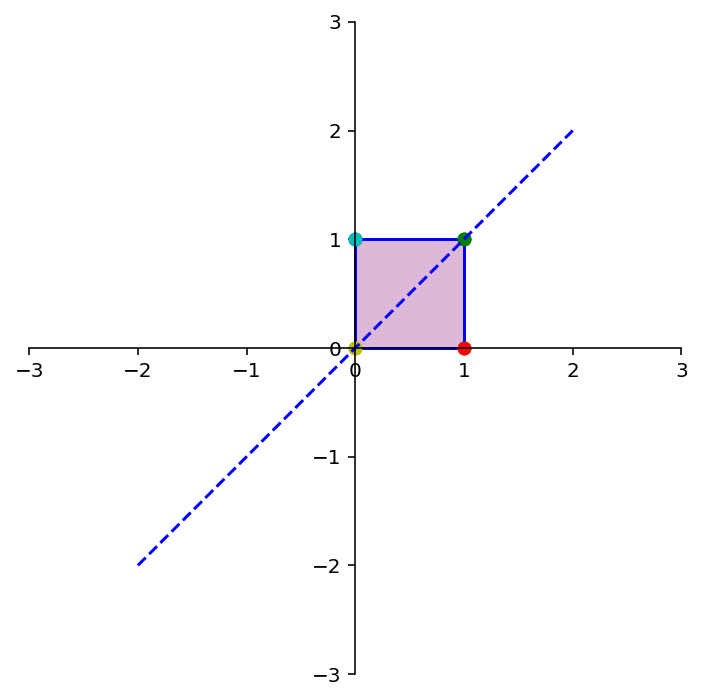

In [52]:
A = np.array(
    [[0,1],
     [1,0]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.plot([-2,2],[-2,2],'b--')
Latex(r'Reflection through the line $x_1 = x_2$')

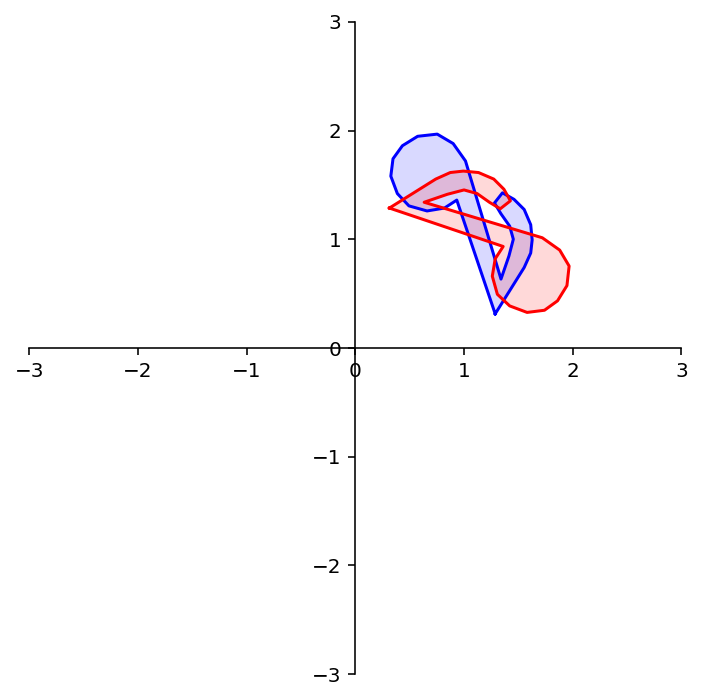

In [53]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the line $x_1 = -x_2$?

<IPython.core.display.Latex object>

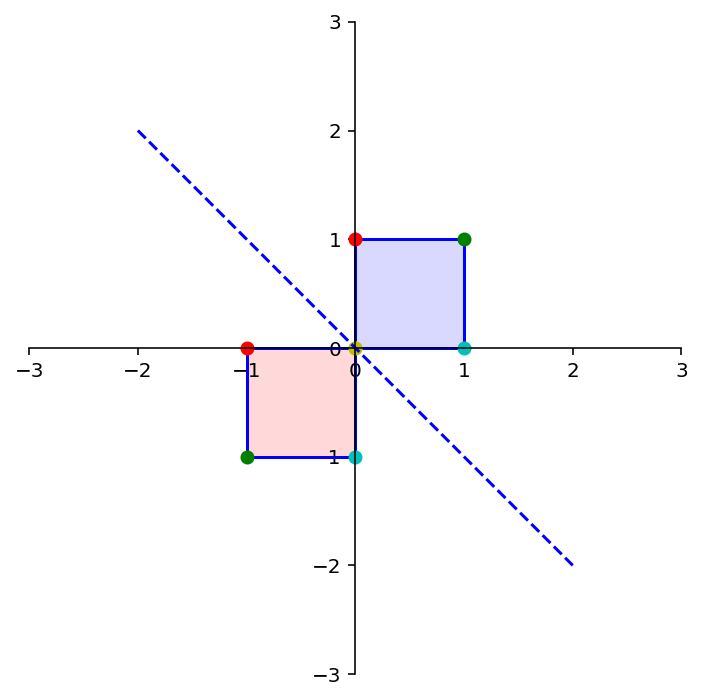

In [54]:
A = np.array(
    [[ 0,-1],
     [-1, 0]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.plot([-2,2],[2,-2],'b--')
Latex(r'Reflection through the line $x_1 = -x_2$')

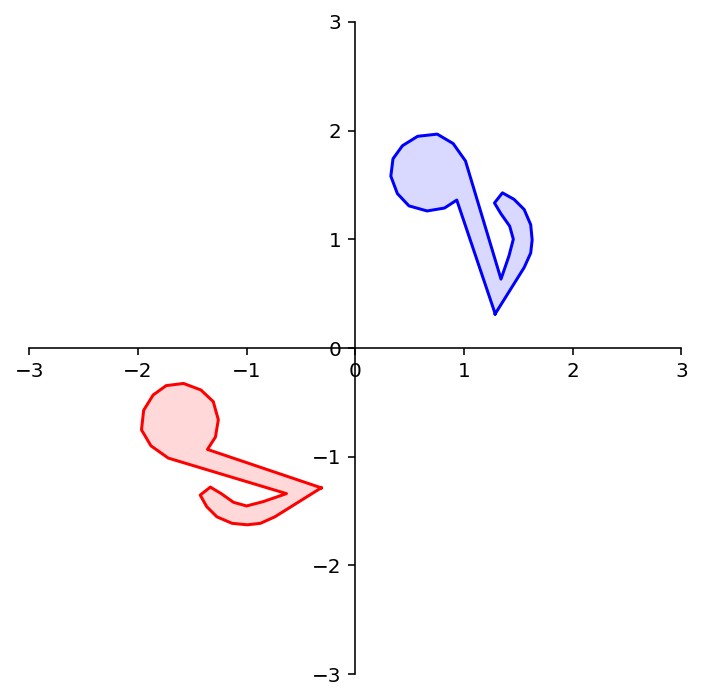

In [55]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the origin?

<IPython.core.display.Latex object>

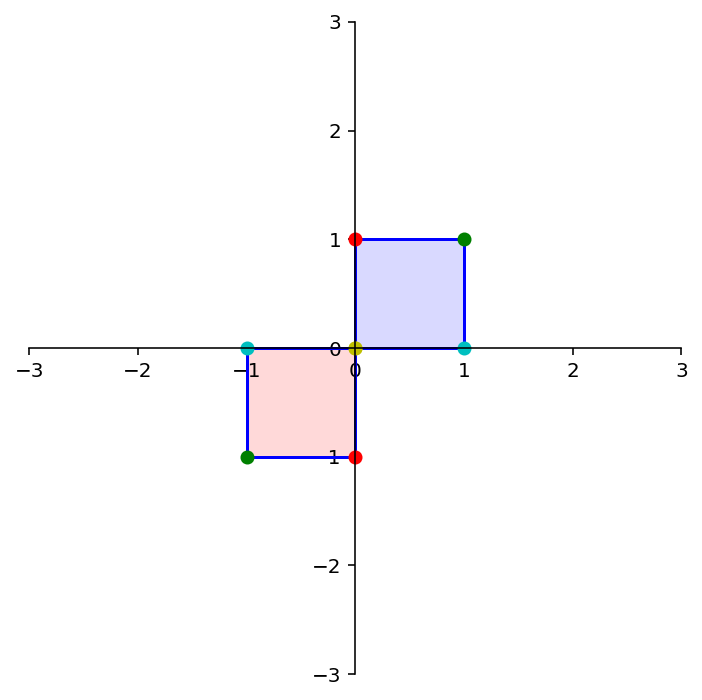

In [56]:
A = np.array(
    [[-1, 0],
     [ 0,-1]])
ax = dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
Latex(r'Reflection through the origin')

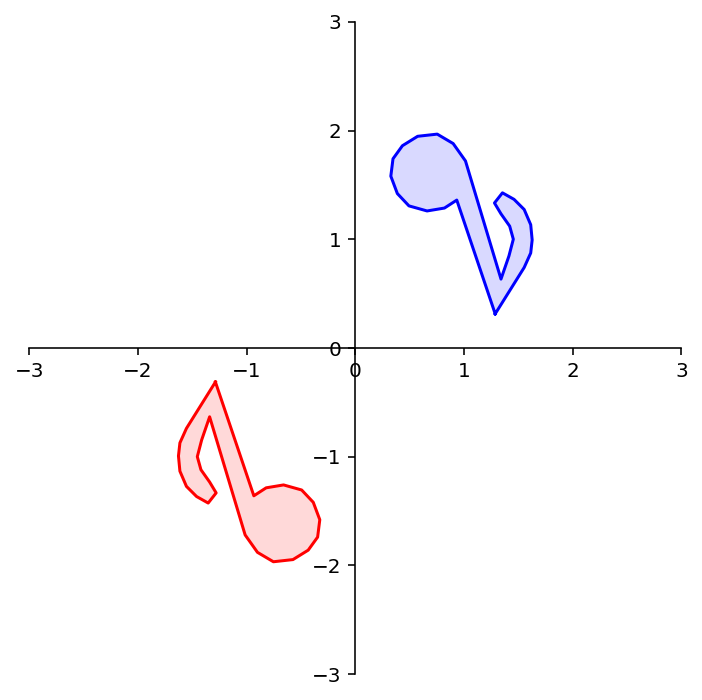

In [57]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

<IPython.core.display.Latex object>

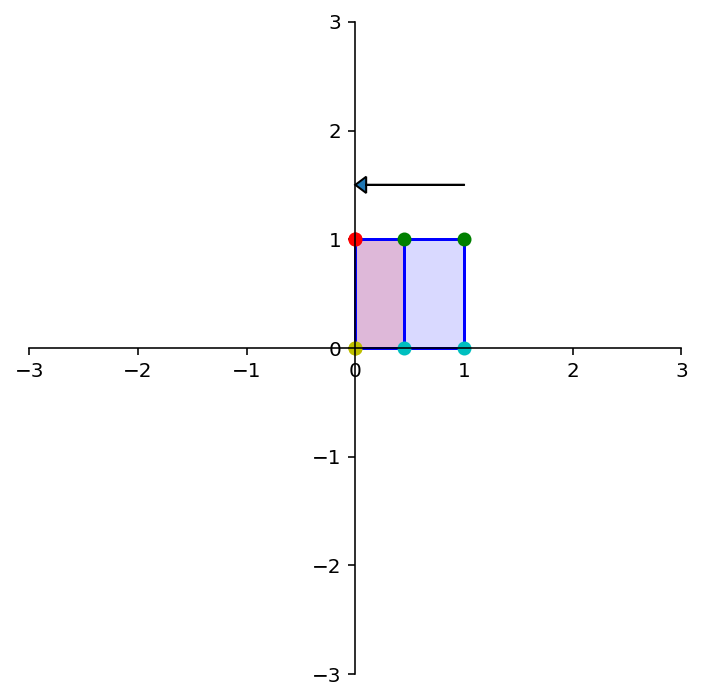

In [58]:
A = np.array(
    [[0.45, 0],
     [0,    1]])
ax = dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
ax.arrow(1.0,1.5,-1.0,0,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Horizontal Contraction')

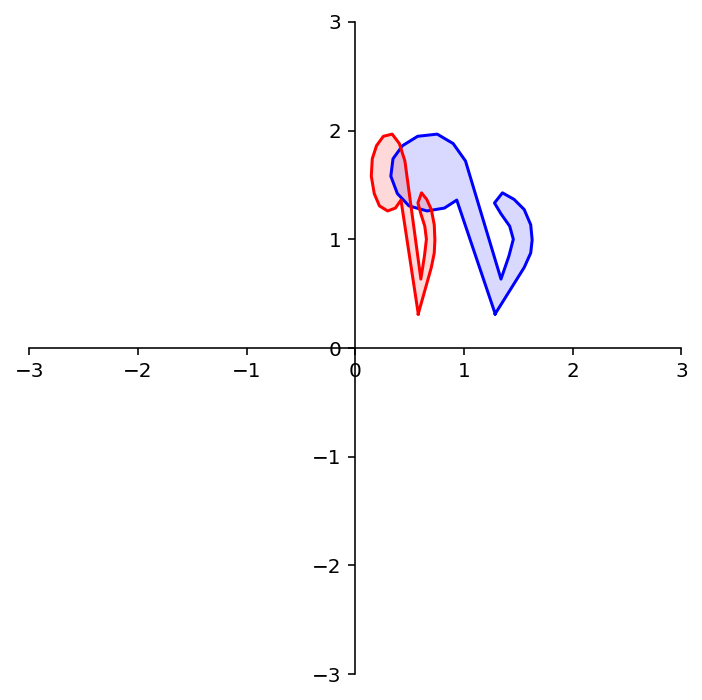

In [59]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

<IPython.core.display.Latex object>

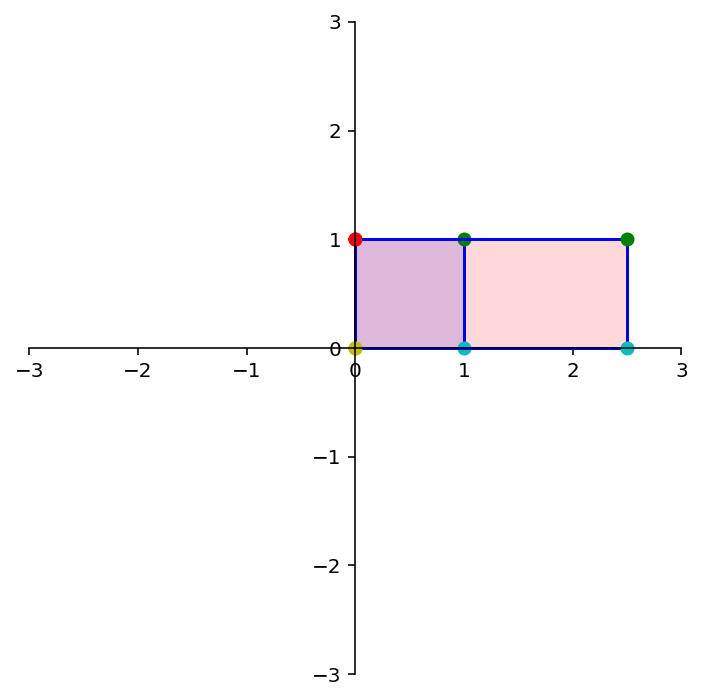

In [60]:
A = np.array(
    [[2.5,0],
     [0,  1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
Latex(r'Horizontal Expansion')

<IPython.core.display.Latex object>

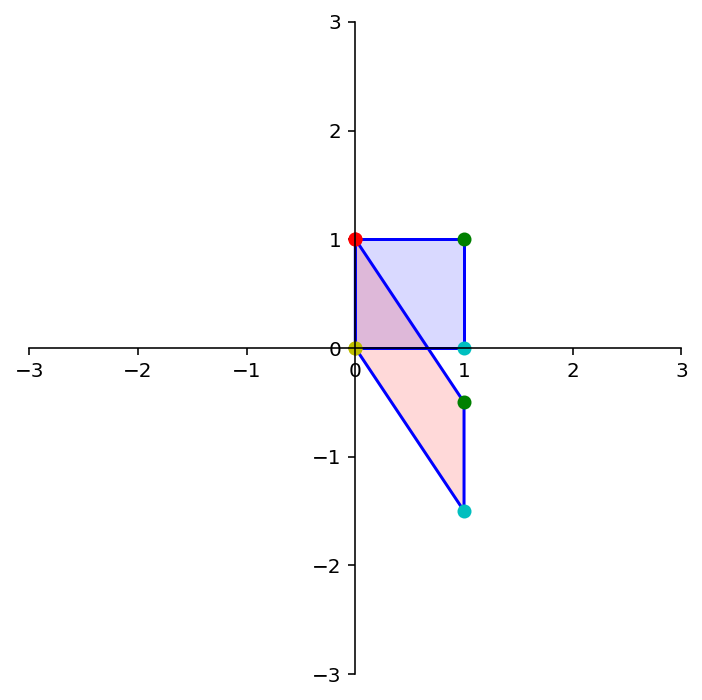

In [61]:
A = np.array(
    [[   1, 0],
     [-1.5, 1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
Latex(r'Vertical Shear')

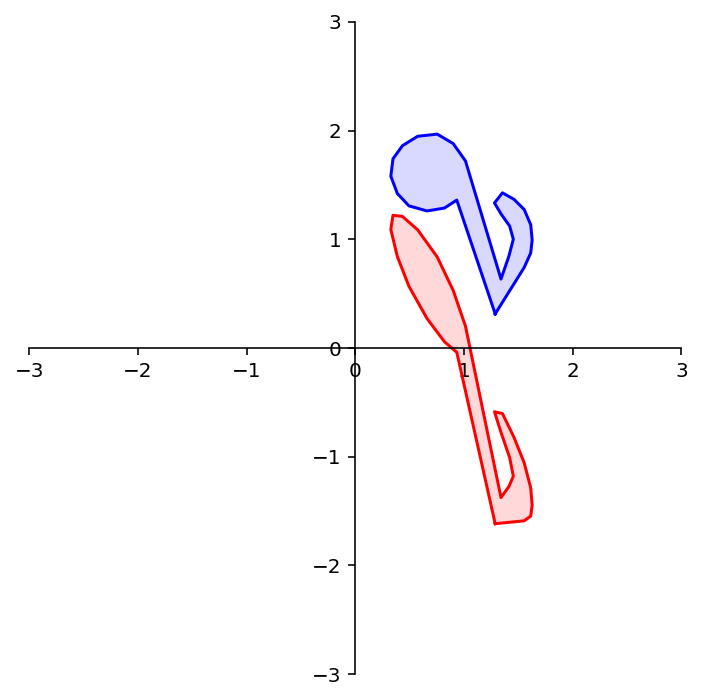

In [62]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

``` {toggle}
Question 8.2
```

Now let's look at a particular kind of transformation called a __projection__.

Imagine we took any given point and 'dropped' it onto the $x_1$-axis.

<IPython.core.display.Latex object>

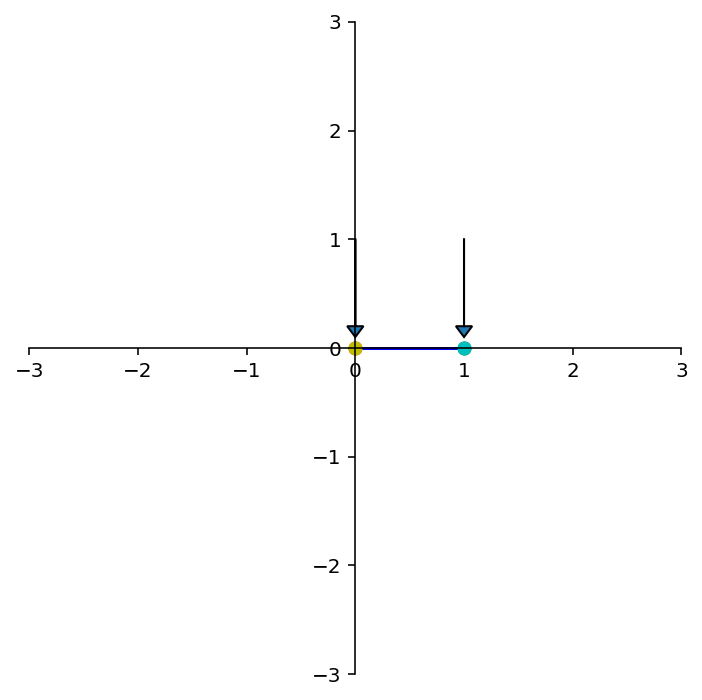

In [63]:
A = np.array(
    [[1,0],
     [0,0]])
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
ax.arrow(1.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(0.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Projection onto the $x_1$ axis')

What happens to the __shape__ of the point set?

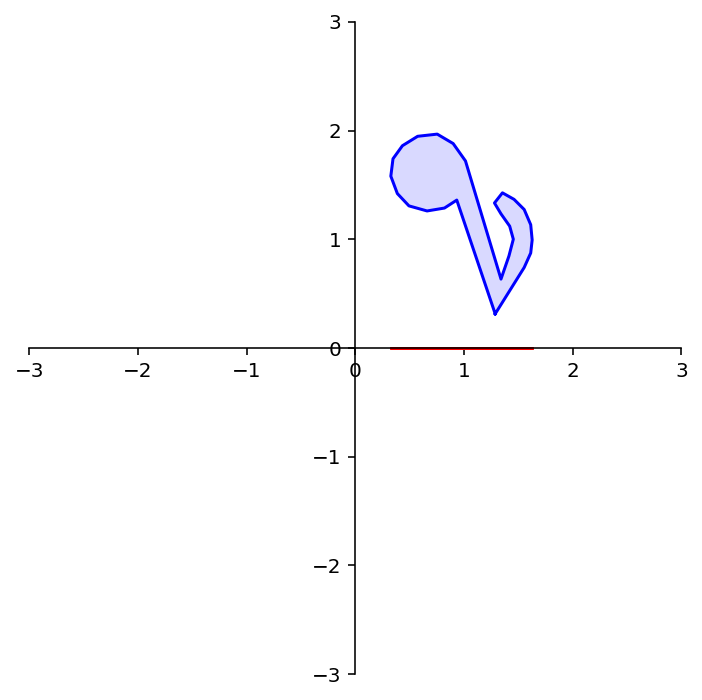

In [64]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

<IPython.core.display.Latex object>

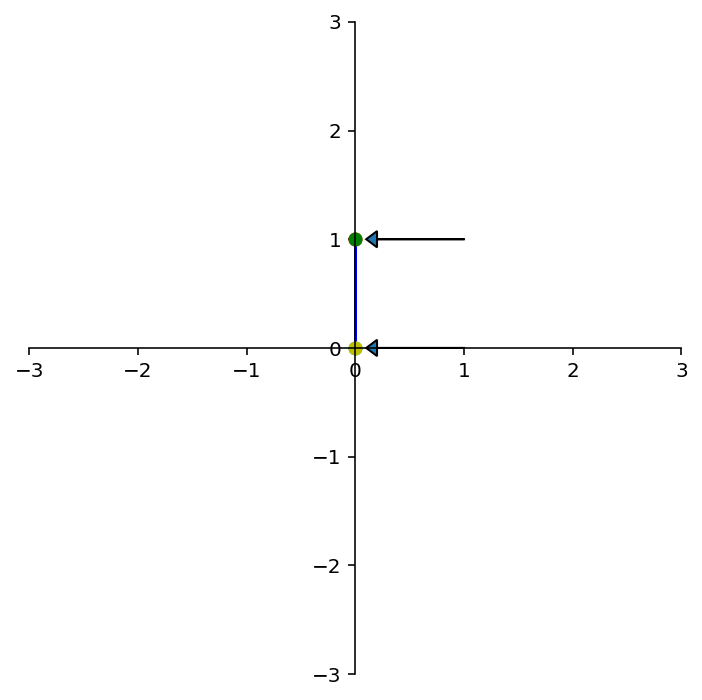

In [65]:
A = np.array(
    [[0,0],
     [0,1]])
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A @ square)
ax.arrow(1.0,1.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(1.0,0.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Projection onto the $x_2$ axis')

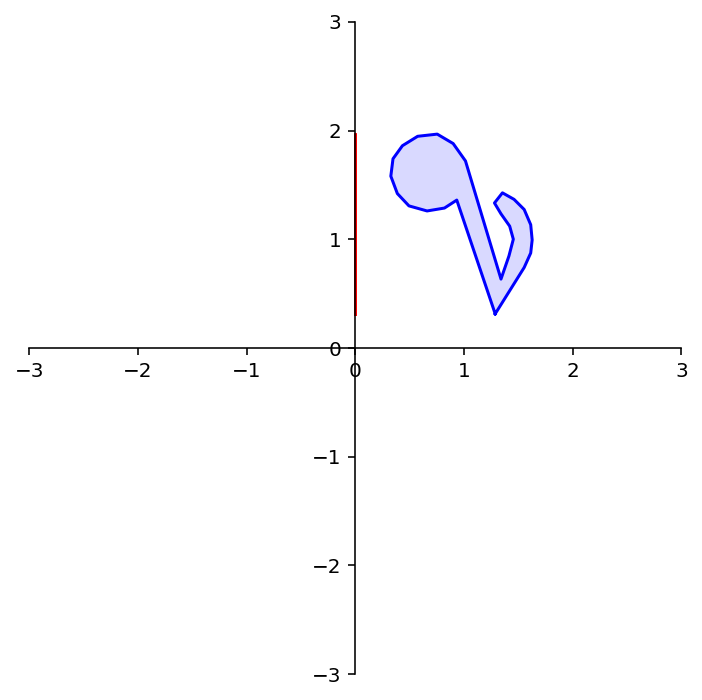

In [66]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

## Existence and Uniqueness

Notice that some of these transformations map multiple inputs to the same output, and some are incapable of generating certain outputs.

For example, the __projections__ above can send multiple different points to the same point.

We need some terminology to understand these properties of linear transformations.

__Definition.__ A mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is said to be __onto__ $\mathbb{R}^m$ if each $\mathbf{b}$ in $\mathbb{R}^m$ is the image of _at least one_ $\mathbf{x}$ in $\mathbb{R}^n$.

Informally, $T$ is onto if every element of its codomain is in its range.

Another (important) way of thinking about this is that $T$ is onto if there is a solution $\mathbf{x}$ of

$$T(\mathbf{x}) = \mathbf{b}$$

for all possible $\mathbf{b}.$

This is asking an __existence__ question about a solution of the equation $T(\mathbf{x}) = \mathbf{b}$ for all $\mathbf{b}.$

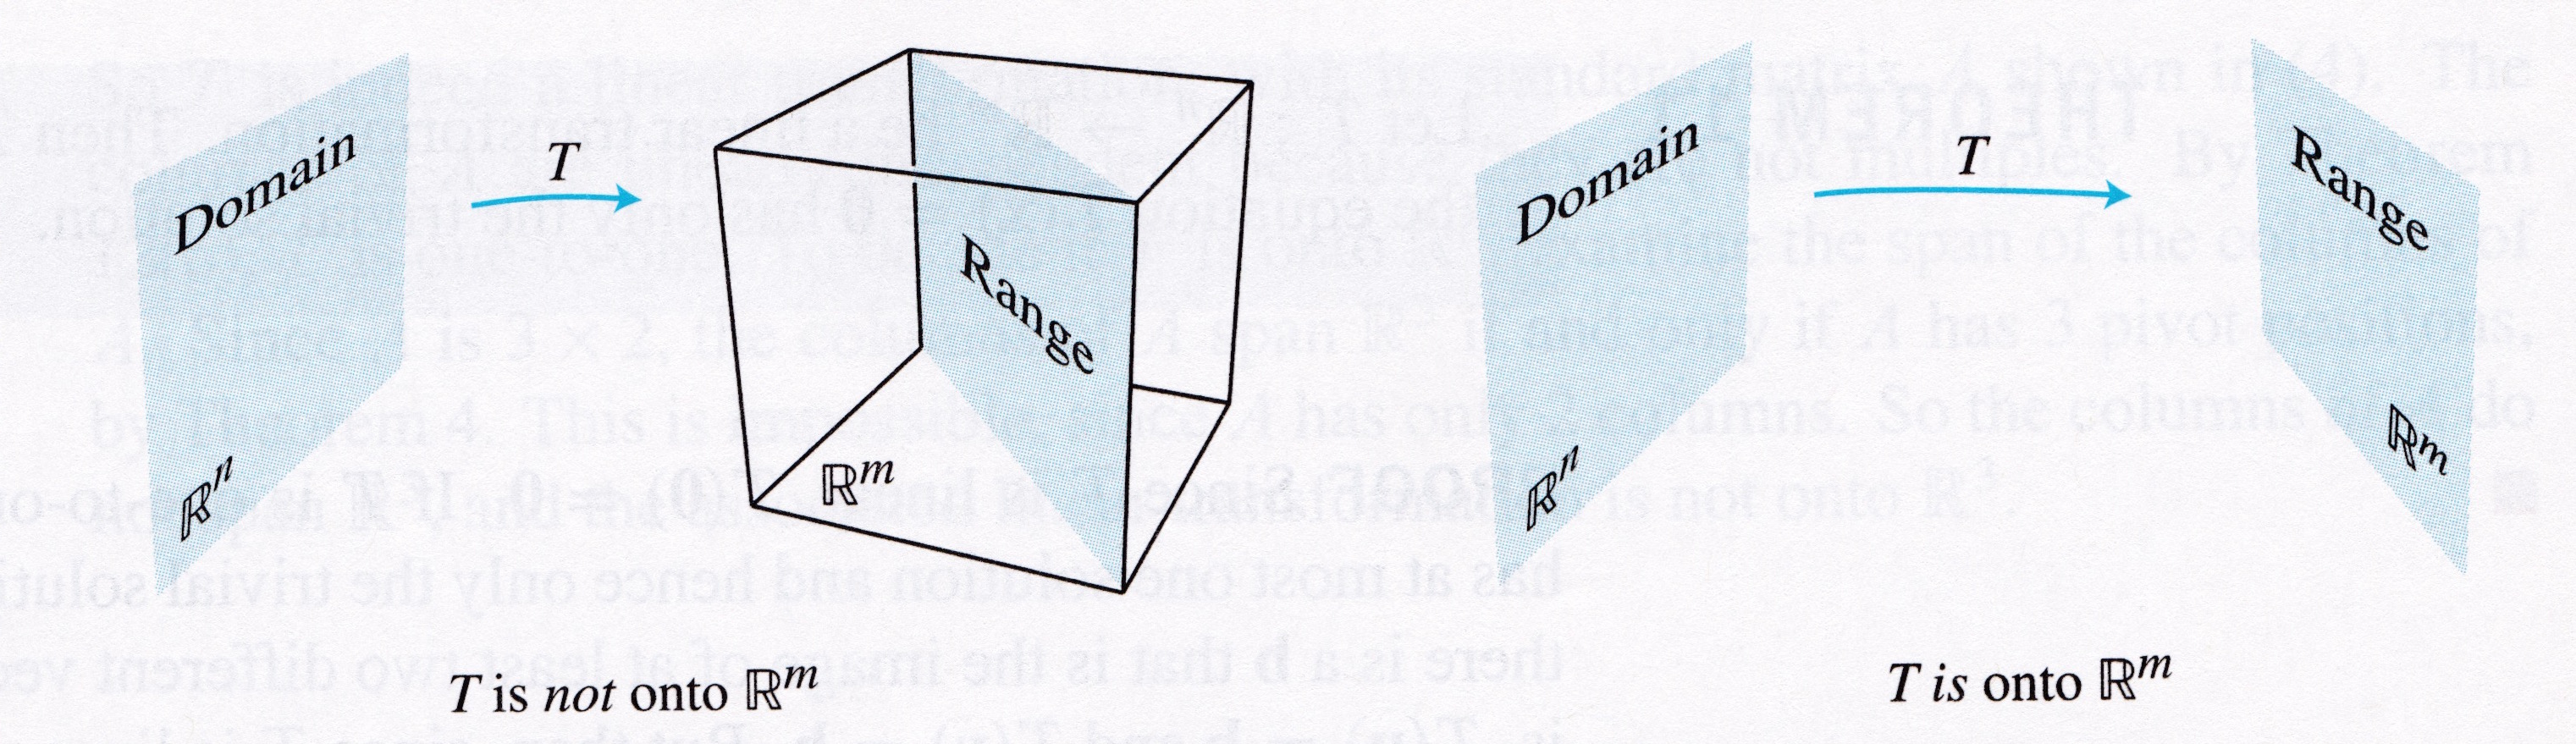

In [67]:
# image credit: Lay, 4th edition
display(Image("images/Lay-fig-1-9-3.jpeg", width=650))

``` {toggle}
Question Time! Q8.3
```

__Definition.__  A mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is said to be __one-to-one__ if each $\mathbf{b}$ in $\mathbb{R}^m$ is the image of _at most one_ $\mathbf{x}$ in $\mathbb{R}^n$.

If $T$ is one-to-one, then for each $\mathbf{b},$ the equation $T(\mathbf{x}) = \mathbf{b}$ has either a unique solution, or none at all.

This is asking an __existence__ question about a solution of the equation $T(\vx) = \vb$ for all $\vb$.

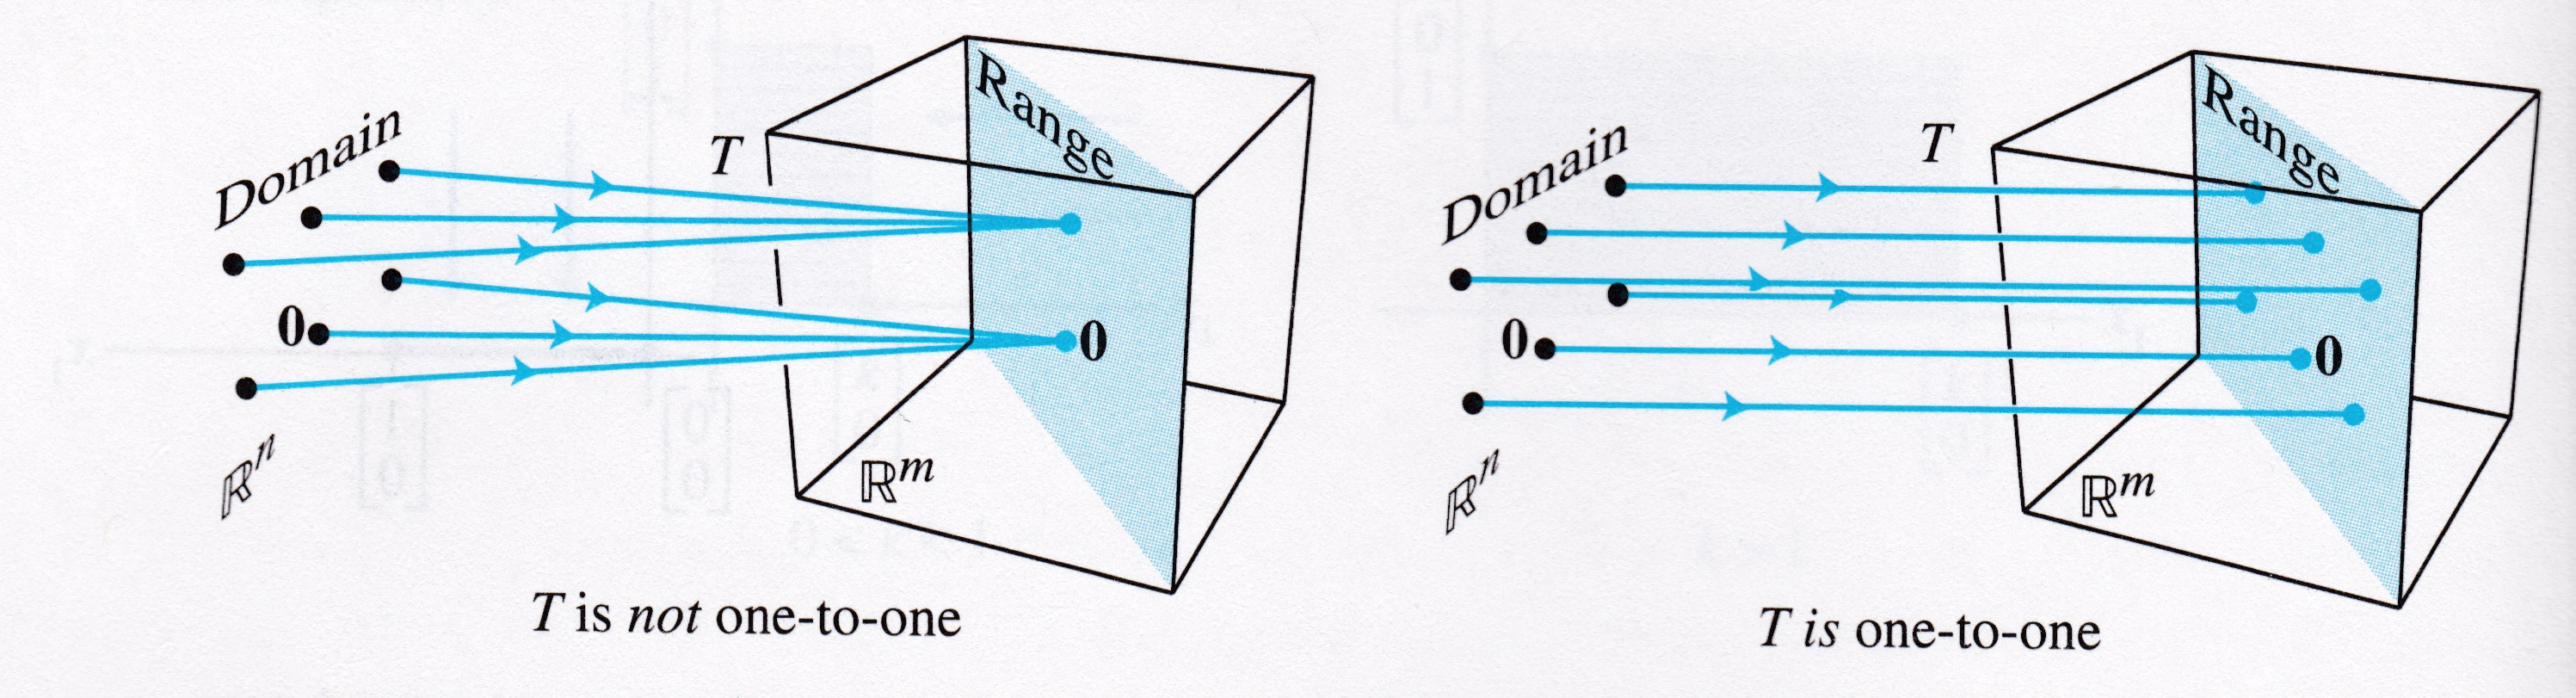

In [68]:
# image credit: Lay, 4th edition
display(Image("images/Lay-fig-1-9-4.jpeg", width=650))

Let's examine the relationship between these ideas and some previous definitions.

If $A\mathbf{x} = \mathbf{b}$ is consistent for all $\mathbf{b}$, is $T(\mathbf{x}) = A\mathbf{x}$  onto?  one-to-one?

$T(\mathbf{x})$ is onto.   $T(\mathbf{x})$ may or may not be one-to-one.  If the system has multiple solutions for some $\mathbf{b}$, $T(\mathbf{x})$ is not one-to-one.

If $A\mathbf{x} = \mathbf{b}$ is consistent and has a unique solution for all $\mathbf{b}$, is $T(\mathbf{x}) = A\mathbf{x}$ onto?  one-to-one?

Yes to both.

If $A\mathbf{x} = \mathbf{b}$ is not consistent for all $\mathbf{b}$, is $T(\mathbf{x}) = A\mathbf{x}$  onto?  one-to-one?

$T(\mathbf{x})$ is __not__ onto.   $T(\mathbf{x})$ may or may not be one-to-one.

If $T(\mathbf{x}) = A\mathbf{x}$ is onto, is $A\mathbf{x} = \mathbf{b}$ consistent for all $\mathbf{b}$?   is the solution unique for all $\mathbf{b}$?

If $T(\mathbf{x}) = A\mathbf{x}$ is one-to-one, is $A\mathbf{x} = \mathbf{b}$ consistent for all $\mathbf{b}$?   is the solution unique for all $\mathbf{b}$?